# Classify handwritten Devanagari characters using ML.

Dataset is from https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset#

This is an image database of Handwritten Devanagari characters. There are 46 classes of characters with 2000 examples each. Each example is a 32x32 png image. The dataset is split into training set (85%) and testing set (15%). The paper shows that using deep convolutional neural network an prediction accuracy of 98.47%.

This dataset is similar to charcter recognition in MNIST.  In this notebook, I have picked the first five classes of characters to build a classifier. Its a huge dataset and wanted to use a smaller subset of the dataset so it consumes less resource on my laptop. 

In [108]:
import numpy as np

In [129]:
X =  np.empty((0,32*32), int)
Y =  np.empty((0,1), int)
print(X)
for im_path in glob.glob("/Users/balaji/Downloads/DevanagariHandwrittenCharacterDataset/Train_image/character_1_ka/*.png"):
    im = imageio.imread(im_path)
    # print(im_path,im.shape)
    X = np.append(X, im1.reshape(1, 32*32), axis=0)

[]


In [105]:
base_path = "/Users/balaji/Downloads/DevanagariHandwrittenCharacterDataset/Train_image/"
characters = ["character_1_ka", "character_2_kha"]

for ch in characters:
    path = base_path + ch + "/*.png"
    print(path)

/Users/balaji/Downloads/DevanagariHandwrittenCharacterDataset/Train_image/character_1_ka/*.png
/Users/balaji/Downloads/DevanagariHandwrittenCharacterDataset/Train_image/character_2_kha/*.png


##  Reading the dataset.

In the MNIST dataset the images were converted to a CSV file.  In this example, we have to convert the image to a data frame.  To achieve this I have used:
- Reading png files and converting it to a dataframe (`imageio.imread`).
- Reading multiple files from a directory (`glob`).


In [146]:
import imageio
import glob

def read_files(folder_name, characters):
    base_path = "/Users/balaji/Downloads/DevanagariHandwrittenCharacterDataset/" + folder_name + "/"
    X =  np.empty((0,32*32), int)
    Y =  np.empty((0,1), int)
    for ch in characters:
        path = base_path + ch + "/*.png"
        for im_path in glob.glob(path):
            im1 = imageio.imread(im_path)
            # print(im_path,im1.shape)
            X = np.append(X, im1.reshape(1, 32*32), axis=0)
            Y = np.append(Y, ch)
    return (X,Y)

In [148]:
# read the characters for training
characters = ["character_1_ka", "character_2_kha", "character_3_ga", "character_4_gha", "character_5_kna"]
train_X, train_Y = read_files("Train_image", characters)


In [159]:
# Get the test dataset
test_X, test_Y = read_files("Test", characters)

In [160]:
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(8500, 1024) (8500,)
(1500, 1024) (1500,)


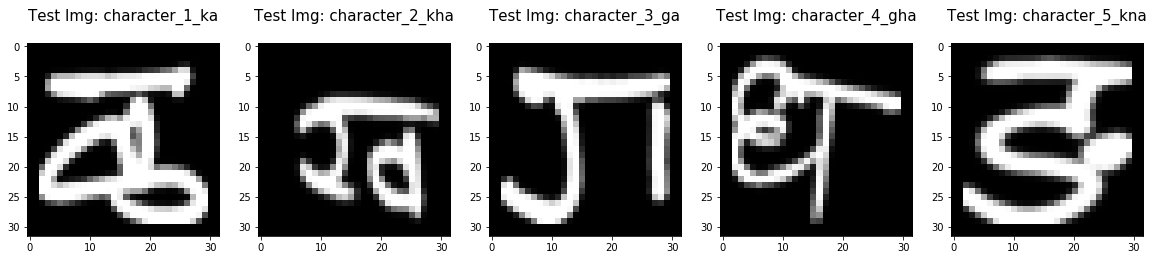

In [178]:
# Let us display some of the characters to see how the characters look.
plt.figure(figsize=(20,5))
for index, (image, label) in enumerate(zip(train_X[[1, 1701, 3401, 5101, 6801]], train_Y[[1, 1701, 3401, 5101, 6801]])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (32,32)), cmap=plt.cm.gray)
    plt.title('Test Img: %s\n' % label, fontsize = 15)

## Classifiers

We will first build a Logistic Regression classifier.  We will use the probability values that is available from the model to see how the various classes have prediction probabilities.

In [158]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs',random_state=10)
model.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
print(model.predict_proba(test_X[[1, 301, 601, 901, 1201]])) # predicted value for the first test row
print(model.predict(test_X[[1, 301, 601, 901, 1201]])) # predicted value for the first test row
print(test_Y[[1, 301, 601, 901, 1201]])  # actual test label

[[  9.99998374e-01   1.61833766e-06   1.45301243e-11   3.71858245e-10
    6.82386118e-09]
 [  6.17523961e-07   1.37097849e-01   5.69094987e-04   1.98146322e-04
    8.62134292e-01]
 [  1.17135664e-04   3.04350256e-01   3.09273429e-01   1.62051670e-07
    3.86259017e-01]
 [  1.58868227e-04   3.97120039e-02   7.54738617e-05   9.60051822e-01
    1.83217580e-06]
 [  7.54863048e-04   2.00802148e-04   1.75499871e-09   6.82787977e-16
    9.99044333e-01]]
['character_1_ka' 'character_5_kna' 'character_5_kna' 'character_4_gha'
 'character_5_kna']
['character_1_ka' 'character_2_kha' 'character_3_ga' 'character_4_gha'
 'character_5_kna']


In [165]:
print(model.predict_proba(test_X[[601]])) # predicted value for the first test row
print(model.predict(test_X[[601]])) # predicted value for the first test row
print(test_Y[[601]])  # actual test label

[[  1.17135664e-04   3.04350256e-01   3.09273429e-01   1.62051670e-07
    3.86259017e-01]]
['character_5_kna']
['character_3_ga']


In [183]:
expected = test_Y 
predicted = classifer_model.predict(test_X)
precision = metrics.accuracy_score(predicted, test_Y) * 100
# summarize the fit of the model
print("Logistic Regression", "accuracy: {0:.6f}".format(precision))

Logistic Regression accuracy: 96.333333


In [184]:
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

[[294   3   0   2   1]
 [  0 294   3   2   1]
 [  0  17 276   5   2]
 [  2   5   3 289   1]
 [  0   4   1   3 292]]


Note that for test sample number 601, the expected character is 'ga'.  However, the classifier predicts it to be character 'kna' with 38% probability, 'kha' with 32.4% probability and 'ga' with 30.9% probability.  From the confusion matrix, such examples are very few.

Overall the prediction probability is 96.33%.

In [171]:
import math
import sklearn.metrics as metrics
# from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Next line is "dictionary" data structure from class 1
d_models = {"Naive Bayes": GaussianNB(),
            "SVM": svm.SVC(random_state=6),
            "KNN3": KNeighborsClassifier(n_neighbors = 3),
            "KNN5": KNeighborsClassifier(n_neighbors = 5),
            "Random Forest10": RandomForestClassifier(n_estimators=10, random_state=6),
            "Random Forest50": RandomForestClassifier(n_estimators=50, random_state=6)}
models_list = d_models.keys()
print(models_list)

dict_keys(['Naive Bayes', 'SVM', 'KNN3', 'KNN5', 'Random Forest10', 'Random Forest50'])


In [172]:
print("Accuracy of various classification methods using the principal components values:")
for classifer_name in models_list:
    classifier = d_models[classifer_name]
    classifer_model = classifier.fit(train_X, train_Y)
    
    # make predictions
    expected = test_Y 
    predicted = classifer_model.predict(test_X)
    precision = metrics.accuracy_score(predicted, test_Y) * 100
    
    # summarize the fit of the model
    print(classifer_name, "accuracy: {0:.6f}".format(precision))
    # print(metrics.classification_report(expected, predicted))

Accuracy of various classification methods using the principal components values:
Naive Bayes accuracy: 78.866667
SVM accuracy: 20.000000
KNN3 accuracy: 98.866667
KNN5 accuracy: 98.866667
Random Forest10 accuracy: 93.600000
Random Forest50 accuracy: 96.333333


In [185]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(test_X,test_Y )
print(model)
# make predictions
expected = test_Y 
predicted = model.predict(test_X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
                 precision    recall  f1-score   support

 character_1_ka       1.00      1.00      1.00       300
character_2_kha       1.00      1.00      1.00       300
 character_3_ga       1.00      1.00      1.00       300
character_4_gha       1.00      1.00      1.00       300
character_5_kna       1.00      1.00      1.00       300

    avg / total       1.00      1.00      1.00      1500



## Results

- Decision tree shows an accuracy of 100% 
- Knn with an accuracy of 98%. 
- Logistic regression 96.3%
- Random forest(50) has an accuracy of 96% 
- Naive Bayes has an accuracy of 76%.
- SVM has lowest acuuracy of 20%

We have picked very few characters and from the visualization above, the characters are significantly different from one another.  Therefore a prediction accuracy of 100% is not surprising.  It will be interesting to see how the classifiers work when there are similar-looking characters.  Moreover, once we have 46 characters rather than just five characters, the accuracy will drop.

Next steps:
- Try these classifiers on similar looking characters.
- Try these classifiers on all the characters and evaluate the resources consumed.